In [84]:
import pandas as pd
import numpy as np
import glob
import pickle
import comex_algoritms as cm


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [87]:
def _read_rank_list(filename):
    with open(filename, 'rb') as f:
        rank_list = pickle.load(f)
        
    rank_list = pd.DataFrame(rank_list)
    return rank_list

def plot_heatmap(plot_df, row):
    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 8))
    original_cmap = 'RdYlBu'
    cmap = matplotlib.colormaps[original_cmap]
    inverse_cmap = cmap.reversed()    
    
    sns.heatmap(plot_df, cmap=inverse_cmap, xticklabels=False, yticklabels=False)
    
    plt.title('Selection of Dimensions Heatmap')
    plt.savefig(f'plots/heatmap_{row}.png')
    plt.show()
    
def plot_doubles(unique_doubles, row):
    x=unique_doubles[:20]['double'].astype(str)
    y=unique_doubles[:20]['count']
    plt.bar(x, y, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Triplets')
    plt.ylabel('Count')
    plt.title('Top 20 Triplets Frequency')

    plt.xticks(rotation=45)

    plt.grid(axis='y', linestyle='--')

    for i, value in enumerate(y):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(f'plots/bar_plot_{row}.png')
    plt.show()

In [88]:
# Get all CSV files in the folder starting with "rank"
pickle_files = glob.glob("temp_files/rank_list_*.pickle")
# Concatenate all DataFrames into a single DataFrame
rank_list = pd.concat(_read_rank_list(f) for f in pickle_files)

rank_list.reset_index(inplace=True, drop=True)
rank_list['cut_round'] = (rank_list.index // 100) + 1 

print(rank_list.shape)

(1985, 7)


In [89]:
sparse = cm._rank_list_to_sparse(rank_list)

plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

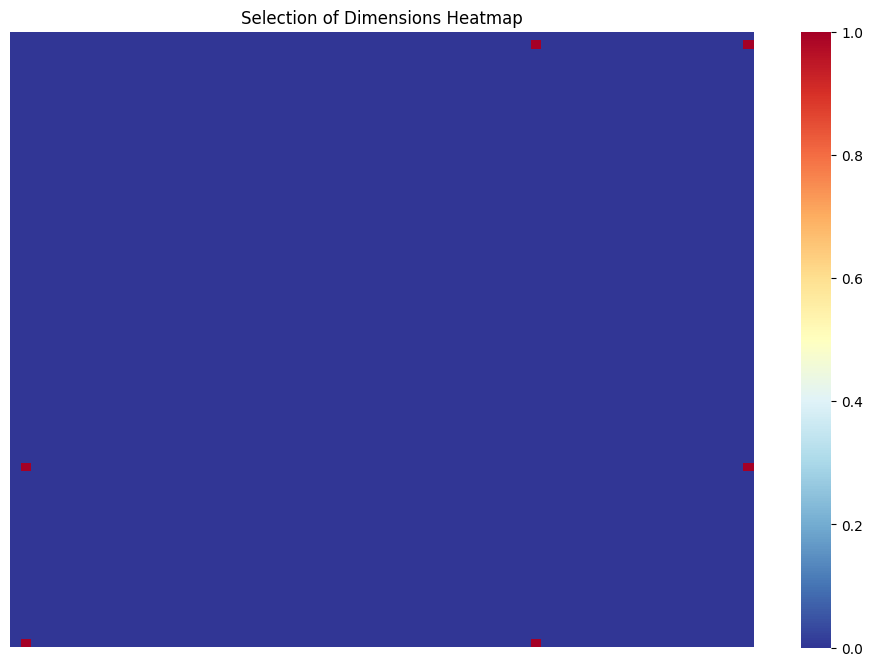

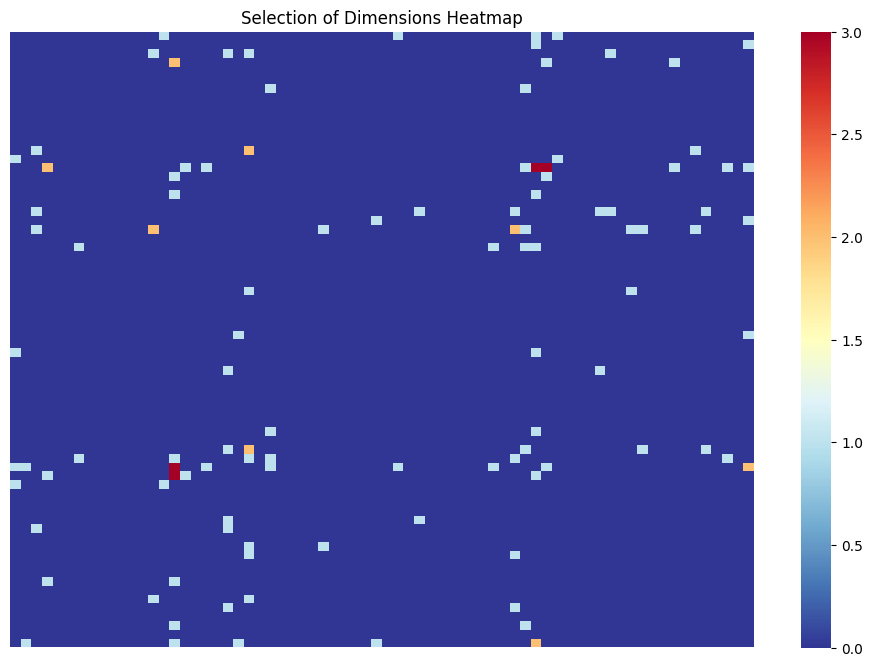

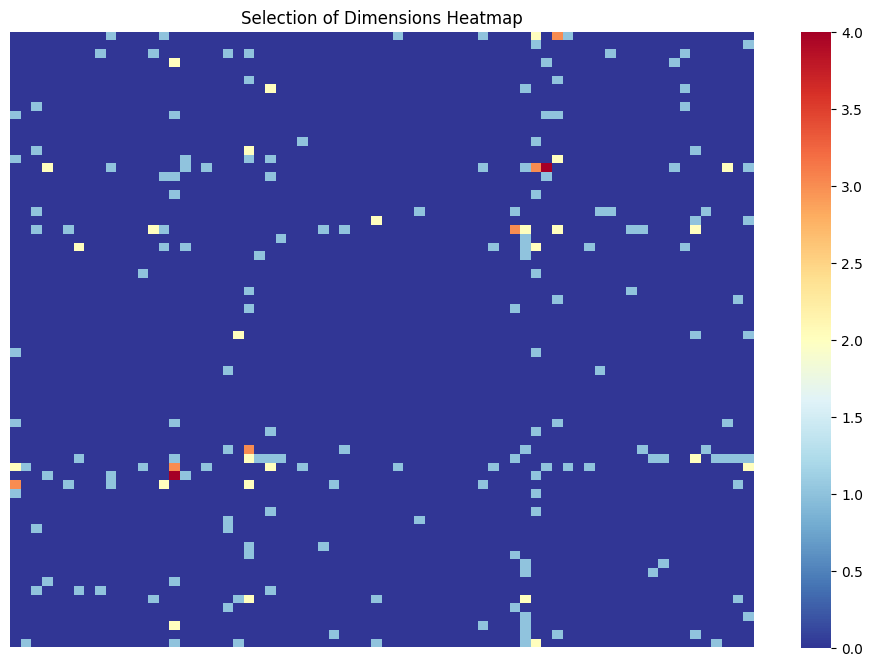

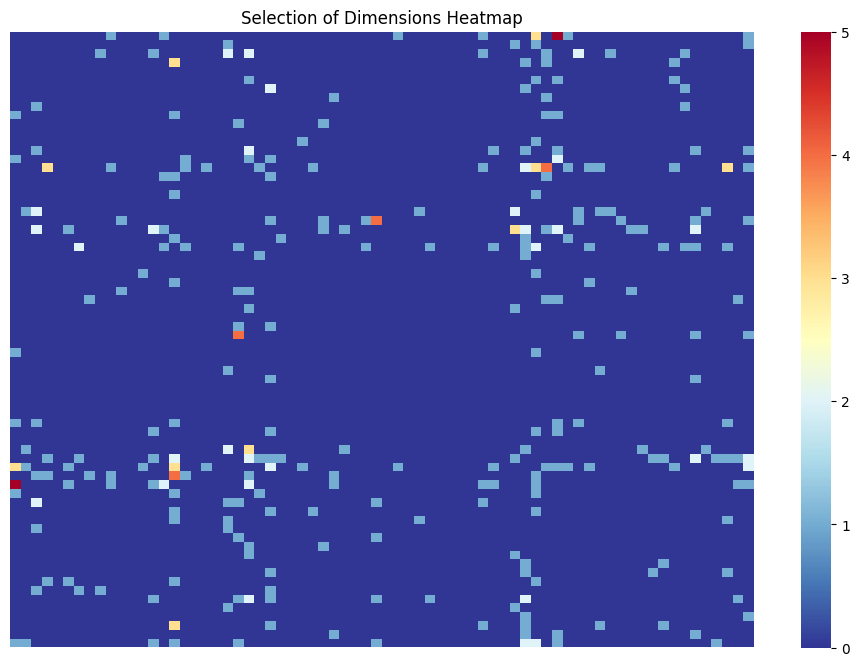

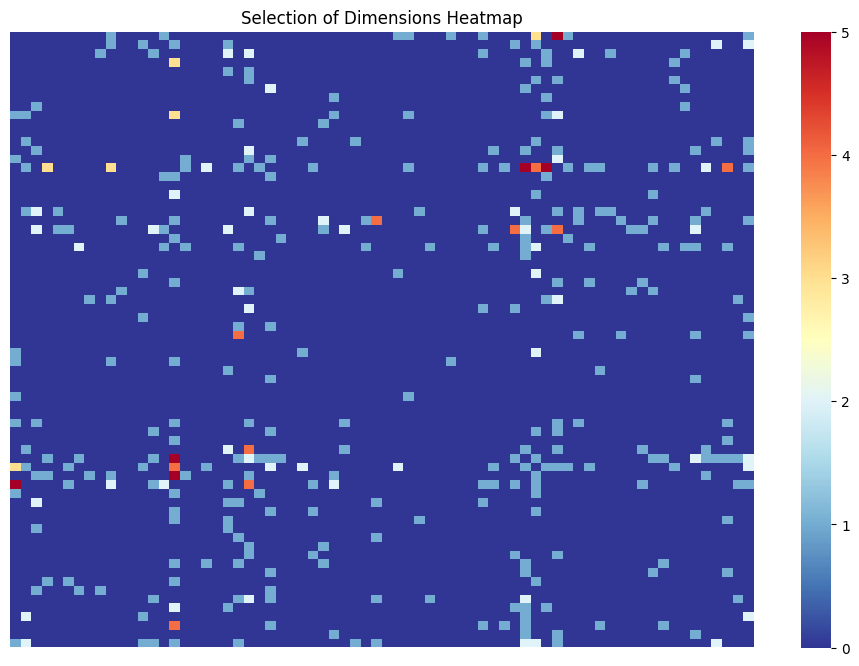

In [90]:
plot_df = pd.DataFrame(columns=sparse.columns, index=sparse.columns)
plot_df.fillna(0, inplace=True)

for row in range(len(rank_list[:100])):
    curr_cut = rank_list[1].iloc[row]
    a = curr_cut[0]
    b = curr_cut[1]
    c = curr_cut[2]
    
#     plot_df[f'col_{a}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{a}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{b}'].loc[f'col_{a}'] += 1
#     plot_df[f'col_{b}'].loc[f'col_{b}'] += 1
    plot_df[f'col_{b}'].loc[f'col_{c}'] += 1

    plot_df[f'col_{c}'].loc[f'col_{a}'] += 1
    plot_df[f'col_{c}'].loc[f'col_{b}'] += 1
#     plot_df[f'col_{c}'].loc[f'col_{c}'] += 1

    if row % 20 == 0:
        plot_heatmap(plot_df, row)
        plot_doubles()

In [ ]:
doubles = []
triplets = []
for row in range(len(first_ranks_list)):
    A = first_ranks_list.iloc[row]['A']
    B = first_ranks_list.iloc[row]['B']
    C = first_ranks_list.iloc[row]['C']
    
    doubles.append(f'{A},{B}')
    doubles.append(f'{A},{C}')
    doubles.append(f'{B},{C}')
    
    triplets.append(f'{A},{B},{C}')
    
doubles = pd.DataFrame(doubles).value_counts()
unique_doubles = pd.DataFrame()
unique_doubles['double']=doubles.index.values
unique_doubles['count'] = doubles.values

In [17]:
unique_triplets = pd.DataFrame(rank_list[1].astype(str).value_counts()).reset_index()
unique_triplets.rename(columns={1: 'count', 'index':'triplet'}, inplace=True)
rounds = []
for row in range(len(unique_triplets)):
    triplet = str(unique_triplets['triplet'].iloc[row])
    rounds.append(rank_list[rank_list[1].astype(str)==triplet]['cut_round'].values)

unique_triplets['rounds']=rounds

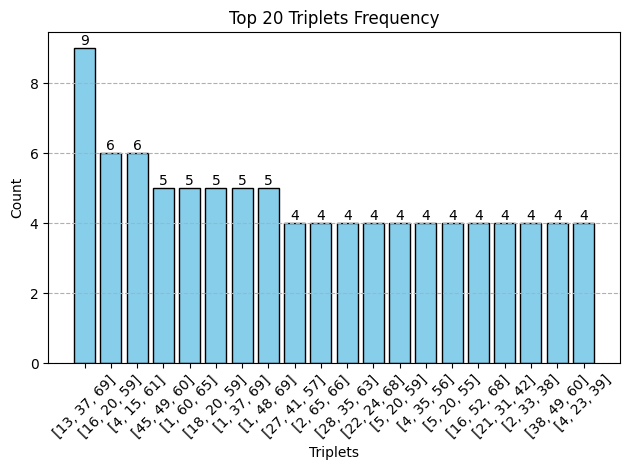

In [22]:
# Plotting the bar plot
x=unique_triplets[:20]['triplet']
y=unique_triplets[:20]['count']
# Plotting the bar plot with customizations
plt.bar(x, y, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Triplets')
plt.ylabel('Count')
plt.title('Top 20 Triplets Frequency')

# Rotating x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Adding grid lines
plt.grid(axis='y', linestyle='--')

# Adding data labels on top of each bar
for i, value in enumerate(y):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Adjusting the layout
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
first_ranks_list = rank_list[:100]

In [24]:
first_ranks_list

,0,1,2,3,4,5,cut_round,A,B,C
0,294,"[1, 9, 53]",0.630901,"(0.5, 0.5, 0.5)","[70, 78, 122, 594, 638, 2332]",3,1,1,9,53
1,1457,"[6, 10, 27]",0.630901,"(0.5, 0.5, 0.5)","[405, 409, 426, 655, 672, 1539]",3,1,6,10,27
2,1358,"[5, 30, 53]",0.630901,"(0.5, 0.5, 0.5)","[340, 365, 388, 1665, 1688, 2332]",3,1,5,30,53
3,983,"[4, 9, 28]",0.724745,"(0.5, 0.5, 0.5)","[274, 279, 298, 594, 613, 1582]",3,1,4,9,28
4,3190,"[14, 30, 52]",0.630901,"(0.5, 0.5, 0.5)","[889, 905, 927, 1665, 1687, 2314]",3,1,14,30,52
...,...,...,...,...,...,...,...,...,...,...
95,1258,"[5, 11, 59]",0.236417,"(0.5, 0.5, 0.5)","[340, 346, 394, 715, 763, 2419]",3,1,5,11,59
96,1222,"[5, 9, 53]",0.630901,"(0.5, 0.5, 0.5)","[340, 344, 388, 594, 638, 2332]",3,1,5,9,53
97,2534,"[10, 54, 69]",0.430403,"(0.5, 0.5, 0.5)","[655, 699, 714, 2349, 2364, 2484]",3,1,10,54,69
98,102,"[0, 20, 55]",0.630901,"(0.5, 0.5, 0.5)","[0, 20, 55, 1210, 1245, 2365]",3,1,0,20,55


In [91]:
doubles = []
triplets = []
for row in range(len(first_ranks_list)):
    A = first_ranks_list.iloc[row]['A']
    B = first_ranks_list.iloc[row]['B']
    C = first_ranks_list.iloc[row]['C']
    
    doubles.append(f'{A},{B}')
    doubles.append(f'{A},{C}')
    doubles.append(f'{B},{C}')
    
    triplets.append(f'{A},{B},{C}')
    
doubles = pd.DataFrame(doubles).value_counts()
unique_doubles = pd.DataFrame()
unique_doubles['double']=doubles.index.values
unique_doubles['count'] = doubles.values

In [92]:
unique_doubles

,double,count
0,"(22,52,)",6
1,"(0,55,)",6
2,"(4,28,)",5
3,"(22,54,)",5
4,"(29,51,)",4
...,...,...
217,"(22,50,)",1
218,"(22,56,)",1
219,"(22,58,)",1
220,"(22,59,)",1
